# Titanic: Machine Learning from Disaster

### In this notebook we are going to analyze the given titanic dataset, apply feature engineering and use different machine learning models with advanced hyperparameter techniques.

### We will also understand what each hyperparamter in models means.

### *Top score achieved by this approach is 0.79186 ( Top 8% )*
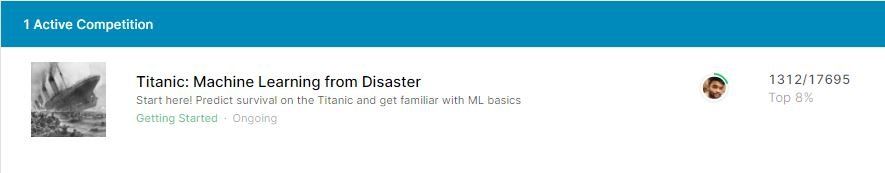

## Whole Process in detail:

* Importing both train and test data and combing the data into a single dataframe so that when can make change to both the dataframes at once and later we can split them 

* visualizing and selecting the columns which need processing 

* visualizing to see how the data is distributed and deciding which machine learning algorithms to use

* Converting some columns to categorical and other feature engineering stuff

* scaling data

* Applying different machine learning models without hyperparameters

* Applying different machine learning models with hyperparameters

* Using soft voting classifier,hard voting classifer and predicting the output with all the combinations of different models

* Choosing the best predictions out of all combinations used with soft and hard voting classifier

### If you like the kernel, please UpVote It! which motivates me to upload more notebooks

## Let's start playing

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')


training = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

In [ ]:
# we are including train_test column so that we can divide the training and test set from the whole_df later

training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
whole_df = pd.concat([training,test])

In [ ]:
# look at the datatypes and null values
training.info()

In [ ]:
test.info()

In [ ]:
# understand better about the numeric data

training.describe()

In [ ]:
# print which columns are numeric 

training.select_dtypes(include=['int','float']).columns

In [ ]:
training.shape

In [ ]:
test.shape

## Visualize Insights of the Categorical Data and Overall Distribution of numerical Data

In [ ]:
# lets use pairplot and see how the data is distributed and the blue and orange colour represents the survived data

df_plot = training[training.describe().columns]
sns.pairplot(df_plot)

### As you can see above the data is spreaded in such a way that we cannot use linear models , so we will eliminate using linear regression and try random forest , logistic regression , knn and xgboost

In [ ]:
sns.barplot(training['Cabin'].value_counts().index,training['Cabin'].value_counts())

In [ ]:
sns.barplot(training['Ticket'].value_counts().index,training['Ticket'].value_counts())

 As you can see above the columns ticket and cabin needs to be processed properly 

## Feature Engineering

In [ ]:
# create all categorical variables to whole_df 
# later we can divide the training and testing set with the help of train_test columns

whole_df['cabin_multiple'] = whole_df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
whole_df['cabin_adv'] = whole_df.Cabin.apply(lambda x: str(x)[0])
whole_df['numeric_ticket'] = whole_df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
whole_df['ticket_letters'] = whole_df.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
whole_df['name_title'] = whole_df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [ ]:
# filling null values with median
whole_df.Age = whole_df.Age.fillna(training.Age.median())
whole_df.Fare = whole_df.Fare.fillna(training.Fare.median())

# drop null. 2 instances of this in training and 0 in test 
whole_df.dropna(subset=['Embarked'],inplace = True)

# The reason we are applying log to the columns below because, after we applied log the dustribution was changed near to normal distribution
whole_df['norm_sibsp'] = np.log(whole_df.SibSp+1)

# log norm of fare (used)
whole_df['norm_fare'] = np.log(whole_df.Fare+1)


In [ ]:
# converted fare to category for pd.get_dummies()

whole_df.Pclass = whole_df.Pclass.astype(str)

#created dummy variables from categories (also can use OneHotEncoder)
whole_dummies = pd.get_dummies(whole_df[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title','train_test']])


In [ ]:
#Split to train test again

X_train = whole_dummies[whole_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = whole_dummies[whole_dummies.train_test == 0].drop(['train_test'], axis =1)

y_train = whole_df[whole_df.train_test==1].Survived

In [ ]:
# Scale data 

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

whole_dummies_scaled = whole_dummies.copy()
whole_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(whole_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
whole_dummies_scaled

X_train_scale = whole_dummies_scaled[whole_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scale = whole_dummies_scaled[whole_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = whole_df[whole_df.train_test==1].Survived

In [ ]:
X_train.columns

In [ ]:
X_test.columns

In [ ]:
y_train.shape

In [ ]:
X_train_scale.shape

In [ ]:
X_test_scale.shape

## The below are the algorithms we are going to apply : 

* Native Bayes theorm

* Logistic Regression 

* Decision Tree

* Knearest Neighbors

* Random Forest 

* Support Vector Classifier

* XGBoost 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [ ]:
gnb = GaussianNB()
lr = LogisticRegression(max_iter = 2000)
dt = tree.DecisionTreeClassifier(random_state = 1)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state = 1)
svc = SVC(probability = True)
xgb = XGBClassifier(random_state =1)

model_list = [gnb,lr,dt,knn,rf,svc,xgb]
for model in model_list:
    print('\n')
    print(model)
    cv = cross_val_score(model,X_train,y_train,cv=10)
    print(cv)
    print(cv.mean())

> #### The above results are without hyperparameters and in them logistic regression performs the best 


## Read below to understand the hyperparameters of gridsearch and randomized search 

### **Grid Search hyperparameters**

* verbose = watch the performance of the already-tried combinations of parameters during the execution ( the more number u give the more details u get ) 

* n_jobs = no of jobs to run in parallel (-1 means the execution uses all the parallel processors for speeding up the excecution)
 
* cv = cross validation ( 3 means the data is folded into 3 partitions and in each fold a test and train set it taken, at last it finds the average accuracy of all the fold ) 

### Randomized search hyperparameters

* n_iters =  no of iterations for trying the different random combinations of hyperparameters
 
* verbose = watch the performance of the already-tried combinations of parameters during the execution ( the more number u give the more details u get ) 

* n_jobs = no of jobs to run in parallel (-1 means the execution uses all the parallel processor for speeding up the excecution)

* cv = cross validation ( 3 means the data is folded into 3 partitions and in each fold a test and train set it taken, at last it finds the average accuracy of all the fold )

In [ ]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

# create a function that automatically returns best score and best hyperparameters
def performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [ ]:

lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train_scale,y_train)
performance(best_clf_lr,'Logistic Regression')

### KNeighborsClassifier hyperparameters 

#### The main parameters of the class sklearn.neighbors.KNeighborsClassifier are:

* weights = uniform (all weights are equal), distance (the weight is inversely proportional to the distance from the test sample), or any other user-defined function

* algorithm (optional) = brute, ball_tree, KD_tree, or auto. In the first case, the nearest neighbors for each test case are computed by a grid search over the training set. In the second and third cases, the distances between the examples are stored in a tree to accelerate finding nearest neighbors. If you set this parameter to auto, the right way to find the neighbors will be automatically chosen based on the training set.

* leaf_size (optional) = threshold for switching to grid search if the algorithm for finding neighbors is BallTree or KDTree;
* metric: minkowski, manhattan, euclidean, chebyshev, or other.

* p = Power parameter for the Minkowski metric. When p = 1, this is
* equivalent to using manhattan_distance (l1), and euclidean_distance
* (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

* n_neighbors = no of neighbors to take (default = 5)

In [ ]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train_scale,y_train)
performance(best_clf_knn,'KNN')

### SVC hyperparameters

#### kernel in svc is used to tranform the data into higher dimensions and apply svc on the transformed data

In [ ]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train_scale,y_train)
performance(best_clf_svc,'SVC')

### Random Forest classifier hyperparameters

* n_esitmators = no of trees created while bagging

* max_features = max number of features considered for splitting the node

* max_depth = max number of levels in the each decision trees

* min_samples_split = minimum no of data points allowed in a leaf node 

* boot strap = method for sampling data ( with or without replacement)


In [ ]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}

clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train_scale,y_train)
performance(best_clf_rf,'Random Forest')

### XGB classifier hyperparameters 

* n_estimators = no of trees created in XGB

* colsample_bytree =  percentage of columns you want to select from a tree for helping overfitting and speeding up the process

* max_depth = depth of each tree 

* alpha = learning rate ( used when getting the predicted values )

* lambda = regularization parameter 

* gamma = it is a user defined penality (it encourages pruning the trees)

* min_child_weight = For regression, that is the minimum number of observations that go to a leaf. For classification, it is the minimum of the hessian

In [ ]:
# doing grid search on all these parameters takes lots of time so i did random search
# based on the result we  will do gridsearch on limited parameters 

xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [20, 50, 100, 250, 500,1000],
    'colsample_bytree': [0.2, 0.5, 0.7, 0.8, 1],
    'max_depth': [2, 5, 10, 15, 20, 25, None],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2],
    'subsample': [0.5,0.6,0.7, 0.8, 0.9],
    'learning_rate':[.01,0.1,0.2,0.3,0.5, 0.7, 0.9],
    'gamma':[0,.01,.1,1,10,100],
    'min_child_weight':[0,.01,0.1,1,10,100],
    'sampling_method': ['uniform', 'gradient_based']
}


clf_xgb_rnd = RandomizedSearchCV(xgb, param_distributions = param_grid, n_iter = 1000, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb_rnd = clf_xgb_rnd.fit(X_train_scale,y_train)
performance(best_clf_xgb_rnd,'XGB')

In [ ]:
xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [500,550,600,650],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65,0.9],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train_scale,y_train)
performance(best_clf_xgb,'XGB')

In [ ]:
# the best parameters we got from grid search is 
best_clf_xgb.best_estimator_

### Lets use soft voting classifier and hard voting classifier 

In [ ]:
best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_rf = best_clf_rf.best_estimator_
best_xgb = best_clf_xgb.best_estimator_

### Lets try the all the combinations by using soft voting classsifier and hard voting classifier 

In [ ]:
# here we are trying all the combinations of models using both hard and soft classifier and see which one is performing better 

from itertools import combinations
from sklearn.ensemble import VotingClassifier
comb_list = []
hard = []
soft = []
list_models = [('lr',best_lr),('knn',best_knn),('svc',best_svc),('rf',best_rf),('xgb',best_xgb)]
for r in range(3,6):
    soft_comb = combinations(list_models,r)
    for i in soft_comb:
        i = list(i)
        models_list1 = []
        for k in i:
            models_list1.append(k[0])
        print('\n')
        print('Voting classifier for {}'.format(models_list1))
        comb_list.append(models_list1)
        vc = VotingClassifier(estimators = i, voting = 'hard') 
#       print('voting_hard :',cross_val_score(vc,X_train,y_train,cv=5))
        print('voting_hard mean :',cross_val_score(vc,X_train,y_train,cv=5).mean())
        hard.append(cross_val_score(vc,X_train,y_train,cv=5).mean())
        vc1 = VotingClassifier(estimators = i, voting = 'soft')
#       print('voting_soft :',cross_val_score(vc1,X_train,y_train,cv=5))
        print('voting_soft mean :',cross_val_score(vc1,X_train,y_train,cv=5).mean())
        soft.append(cross_val_score(vc1,X_train,y_train,cv=5).mean())

## Convert the above results to a dataframe so that we can analyze better

In [ ]:
comb_list1 = comb_list
hard1 = hard
soft1 = soft 

In [ ]:
comb_list1 = [str(x) for x in comb_list1]
comb_list1 = pd.Series(comb_list1)
df = pd.DataFrame([hard,soft],columns=comb_list1)
df = df.T
df = df.rename(columns = {0:'hard',1:'soft'})
df = df.sort_values('soft',ascending = False)
df

### Even though we are getting 80% + accuracy ,there will minor overfitting with these models
### we will write a code which saves all predictions got by the above model
### later we will randomly select and submit the predictions to kaggle 

In [ ]:
list_models = [('lr',best_lr),('knn',best_knn),('svc',best_svc),('rf',best_rf),('xgb',best_xgb)]
for r in range(3,6):
    soft_comb = combinations(list_models,r)
    for i in soft_comb:
        i = list(i)
        models_list1 = []
        for k in i:
            models_list1.append(k[0])
            
        # hard voting classifier
        
        vc = VotingClassifier(estimators = i, voting = 'hard') 
        vc.fit(X_train_scale, y_train)
        predictions_hard = vc.predict(X_test_scale).astype(int)
        final_data_hard = {'PassengerId': test.PassengerId, 'Survived': predictions_hard}
        submission_hard = pd.DataFrame(data=final_data_hard)
        filename = ''
        for k in range(len(i)):
            filename+=(i[k][0]+'_')
            
        submission_hard.to_csv('hard_{}.csv'.format(filename),index=False)
        
        # soft voting classifier
        
        vc = VotingClassifier(estimators = i, voting = 'soft') 
        vc.fit(X_train_scale, y_train)
        predictions_soft = vc.predict(X_test_scale).astype(int)
        final_data_soft = {'PassengerId': test.PassengerId, 'Survived': predictions_soft}
        submission_soft = pd.DataFrame(data=final_data_soft)
        filename = ''
        for k in range(len(i)):
            filename+=(i[k][0]+'_')
            
        submission_soft.to_csv('soft_{}.csv'.format(filename),index=False)

### Now you will have all the submissions No need to try all the submissions because there are many, just choose randomly by analyzing the below table
   
### I got 0.79186 with soft voting with the combination of knn,rf,svc. The file name of submission is (soft_knn_svc_rf_.csv)

### This is my first notebook in kaggle , so if there are any possible improvments please comment below

### Will include more visualizations in future 

## If you have any doubts please do comment and if you like please upvote :)